#Notebook: Graficas
###Por: Maria Camila Remolina Gutiérrez

En este notebook se ponen en cero los pixels de sustraccion4D que estén debajo de la media y debajo de la mediana de todas las imagenes

In [10]:
%pylab inline
import os
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


In [8]:
#Paths
path_graficas = './imagenes/graficas/'
path_coadicion = './data/coadicion/'
path_supernova = './data/supernova/'

In [11]:
coadiciones = sort(os.listdir(path_coadicion))
supernovas = sort(os.listdir(path_supernova))

In [6]:
archivo_sustraccion4D = fits.open('./imagenes/sustraccion_4D/sustraccion4D.fits')
sustraccion4D = archivo_sustraccion4D[0].data
archivo_sustraccion4D.close()

In [7]:
shape_visitas = shape(sustraccion4D)
print shape_visitas

(1200, 1200)


In [13]:
visitas = concatenate(([path_supernova+supernova_fn for supernova_fn in supernovas],[path_coadicion+coadiciones[0]]))
num_visitas = len(visitas)
print visitas

['./data/supernova/+1.fits' './data/supernova/+3.fits'
 './data/supernova/-1,2.fits' './data/supernova/-2,2.fits'
 './data/supernova/-3.fits' './data/supernova/-4.fits'
 './data/supernova/0.fits' './data/coadicion/coadicion.fits']


In [15]:
cubo = zeros((shape_visitas[0],shape_visitas[1],num_visitas))

In [16]:
#Sustraccion4D vs Media
#Grafico solo los puntos arriba de la media para cada pixel

for i in range(num_visitas): 
    
    nombre_visita = visitas[i]
    visita = fits.open(nombre_visita)

    visita_i = visita[1].data
    #visita_i = visita_i*60000/amax(visita_i) #para normalizar
    
    for fila in range(shape_visitas[0]):
        for columna in range(shape_visitas[1]):
            
            pixel = visita_i[fila][columna]
            
            cubo[fila][columna][i] = pixel
         
    visita.close() 

In [19]:
media = zeros(shape_visitas)
mediana = zeros(shape_visitas)

In [20]:
for fila in range(shape_visitas[0]):
    for columna in range(shape_visitas[1]):
        
        linea = cubo[fila][columna][:]
        
        pixel = sustraccion4D[fila][columna]
        
        if (pixel > average(linea)):
            media[fila][columna] = pixel
        
        if (pixel > median(linea)):
            mediana[fila][columna] = pixel

In [21]:
#Media
hdu = fits.PrimaryHDU(media)
hdu.writeto(path_graficas+'media.fits')

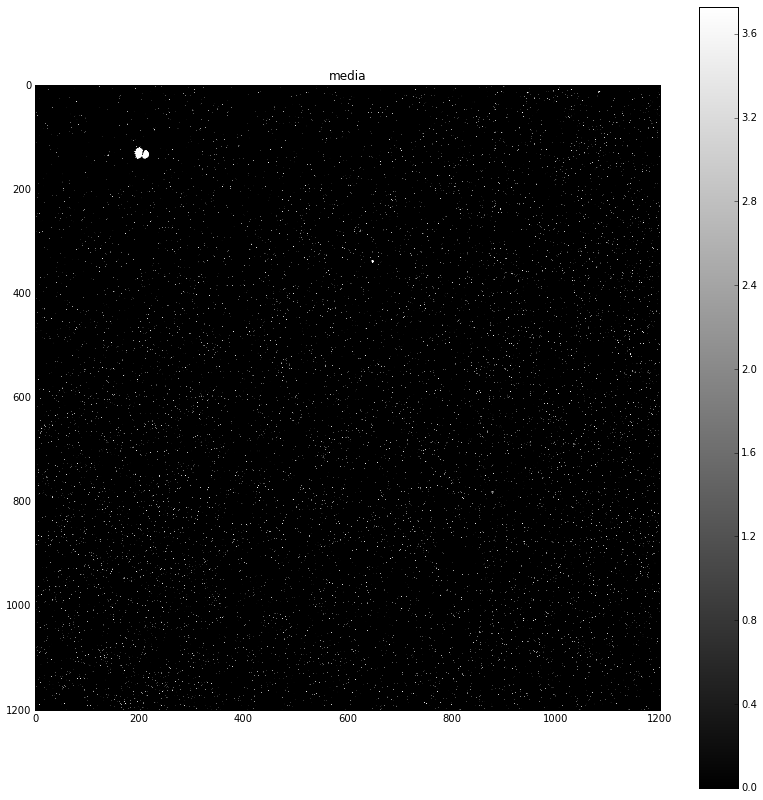

In [25]:
#Grafico solo los puntos arriba de la media
fig = figure(figsize=(14,14))
imshow(media, cmap='gray',vmin=0,vmax=3.73)
colorbar()
title('media')
savefig(path_graficas+'media.png', bbox_inches='tight')
show()
close()

In [22]:
#Mediana
hdu = fits.PrimaryHDU(mediana)
hdu.writeto(path_graficas+'mediana.fits')

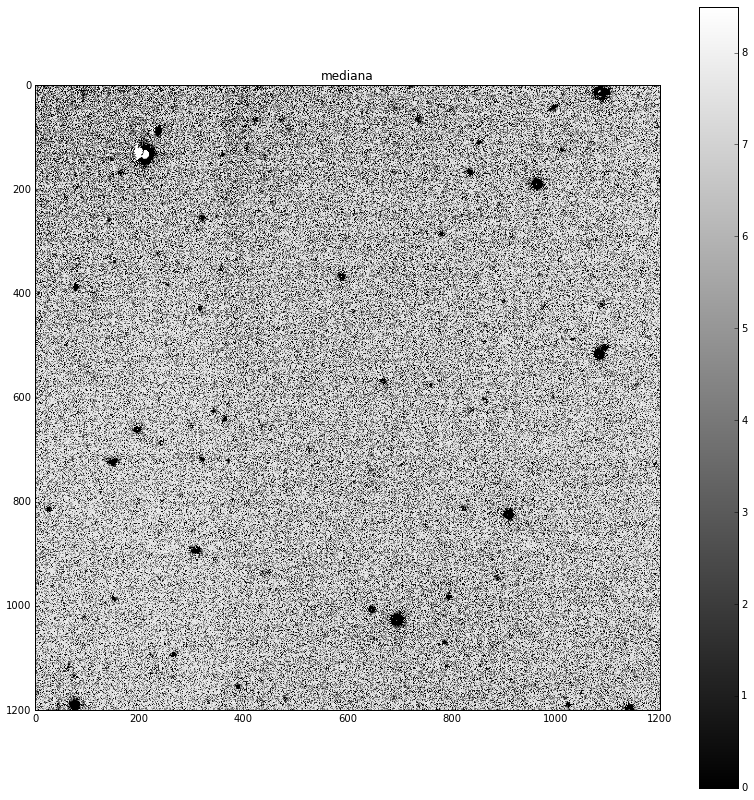

In [23]:
#Grafico solo los puntos arriba de la mediana
fig = figure(figsize=(14,14))
imshow(mediana, cmap='gray',vmin=0,vmax=8.5)
colorbar()
title('mediana')
savefig(path_graficas+'mediana.png', bbox_inches='tight')
show()
close()